In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [4]:
# loading hyperspectral image HOUSTON DATASET 2013

hs = np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/hs_houston.npy')

In [5]:
# number of row 349 and number of columns is 1905
print(type(hs))
print(hs.shape)
print(380*1050)
#plt.figure(figsize=(10,10))



<class 'numpy.ndarray'>
(144, 664845)
399000


In [6]:
# reshaping the hyperspectra image from bands x pixels into a cube row x columns x bands
hs_cube = np.reshape(hs.T,(349,1905,144))
print(hs_cube.shape)

(349, 1905, 144)


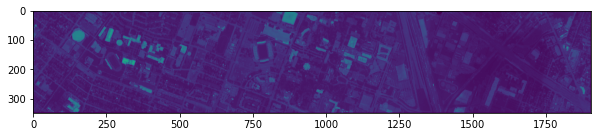

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(hs_cube[:,:,10])

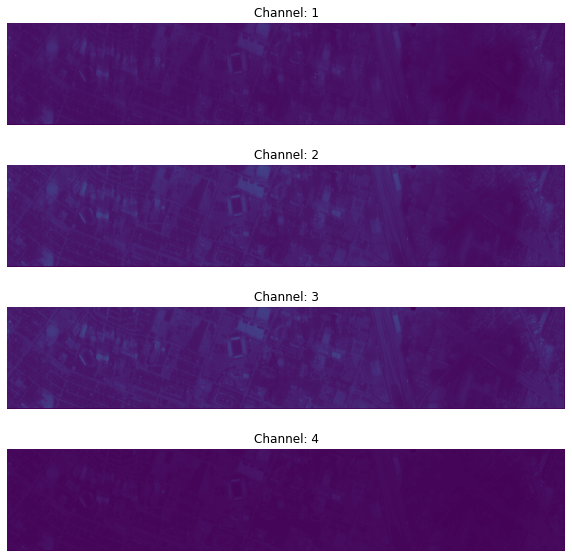

In [8]:
# plotting different channels
channels = (1,2,3,4)
_, fig = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
for ax, image, channel in zip(fig, hs_cube.T[:,:,:], channels):
    ax.set_axis_off()
    ax.imshow(image.T)
    ax.set_title("Channel: %i" % channel)

In [9]:
# loading testins and training dataset

test_number_sample_perclass= np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/test_number_sample_perclass.npy')
train_number_sample_perclass= np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/train_number_sample_perclass.npy')

train_class_labels = np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/train_classes_label.npy') 
test_class_labels = np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/test_classes_label.npy') 

size_test = np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/size_test.npy') 
size_train = np.load('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/project files/size_train.npy') 


print("number of pixels for training",size_train)
print("number of pixels for testing",size_test)

print("NUMBER OF SAMPLES IN TEST SET")
for index in range(len(test_number_sample_perclass)):
    print("class#{0:d} number of sample {1:d}".format(index,test_number_sample_perclass[index]))

print("\n NUMBER OF SAMPLES IN TRAINING SET")
for index in range(len(train_number_sample_perclass)):
    print("class#{0:d} number of sample {1:d}".format(index,train_number_sample_perclass[index]))


number of pixels for training 2832
number of pixels for testing 12002
NUMBER OF SAMPLES IN TEST SET
class#0 number of sample 1045
class#1 number of sample 1034
class#2 number of sample 502
class#3 number of sample 1053
class#4 number of sample 1057
class#5 number of sample 143
class#6 number of sample 1018
class#7 number of sample 1042
class#8 number of sample 1033
class#9 number of sample 1034
class#10 number of sample 1023
class#11 number of sample 1031
class#12 number of sample 269
class#13 number of sample 246
class#14 number of sample 472

 NUMBER OF SAMPLES IN TRAINING SET
class#0 number of sample 198
class#1 number of sample 190
class#2 number of sample 192
class#3 number of sample 188
class#4 number of sample 186
class#5 number of sample 182
class#6 number of sample 196
class#7 number of sample 191
class#8 number of sample 193
class#9 number of sample 191
class#10 number of sample 181
class#11 number of sample 192
class#12 number of sample 184
class#13 number of sample 181
clas

In [10]:
print(test_number_sample_perclass[0])

1045


In [14]:
# load pixels for training and testing

with open('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/Hyperspectral-ML project/data_houston/train_classes_pixels.pkl','rb') as pickle_file:
     train_classes_pixels = pickle.load(pickle_file)

with open('/Users/carlos-theran/Documents/famu-spring22/Mat4906-ML/Hyperspectral-ML project/data_houston/test_classes_pixels.pkl','rb') as pickle_file:
     test_classes_pixels = pickle.load(pickle_file)


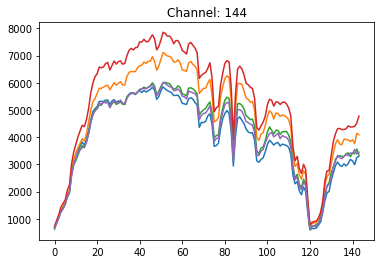

In [15]:
# plotting spectral signature of training and testing pixels
pixels = (1,2,3,4,5)
class_pixels = 0
bands = 144
fig,ax = plt.subplots() #create figure and axes
for pixels_index in range(0,len(pixels)):
    ax.plot(range(0,bands), hs[:,test_classes_pixels[10][pixels[pixels_index]]])
    ax.set_title("Channel: %i" % bands)


In [16]:
# creating train and test variables
n_classes = 15

# Building data for training and testing
x_train = []
for i in range(n_classes):
    for j in range(train_number_sample_perclass[i]):
        x_train.append(hs[:, train_classes_pixels[i][j]])
x_train = np.array(x_train)

x_test = []
for i in range(n_classes):
    for j in range(test_number_sample_perclass[i]):
        x_test.append(hs[:, test_classes_pixels[i][j]])
x_test = np.array(x_test)

In [23]:
# SVM classifier: x_train is row x bands
svm_model = svm.SVC()
svm_model.fit(x_train, train_class_labels)
results_svm = svm_model.predict(x_test)

In [24]:
#computing evaluation
print(metrics.classification_report(results_svm,test_class_labels))

              precision    recall  f1-score   support

           1       0.81      0.96      0.88       881
           2       0.84      0.95      0.89       913
           3       0.99      0.49      0.66      1008
           4       0.89      0.98      0.94       958
           5       0.97      0.91      0.94      1131
           6       0.83      0.12      0.21      1015
           7       0.63      0.64      0.63       992
           8       0.20      0.86      0.32       241
           9       0.76      0.59      0.66      1339
          10       0.23      0.60      0.34       404
          11       0.61      0.44      0.51      1424
          12       0.25      0.56      0.34       451
          13       0.30      0.20      0.24       399
          14       0.98      0.59      0.74       407
          15       0.93      1.00      0.96       439

    accuracy                           0.65     12002
   macro avg       0.68      0.66      0.62     12002
weighted avg       0.75   

/Users/carlos-theran/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 849    9  155   13    0   19    0    0    0    0    0    0    0    0
     0]
 [  10  871   35    1    1  116    0    0    0    0    0    0    0    0
     0]
 [   0    0  496    0    0    0    1    0    0    0    3    2    0    0
     0]
 [  22   16   20  942    0   50    3    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1024    0    0   11    1    6    3    1    0   10
     1]
 [   0    1    1    0    6  119    4    3    1    1    2    5    0    0
     0]
 [   0   13  185    2    0   65  638    0    0    0   26    0    1   88
     0]
 [   0    0    7    0   32  187   22  208   54    3   39  129  310   51
     0]
 [   0    0   24    0   26    0    7    2  788   49  120   10    0    7
     0]
 [   0    0    2    0    0  325    6    0  115  241  329   15    1    0
     0]
 [   0    0   35    0    0  115  187    0   57    5  623    0    0    1
     0]
 [   0    0   42    0   26    0   91    0  286   96  230  253    7    0
     0]


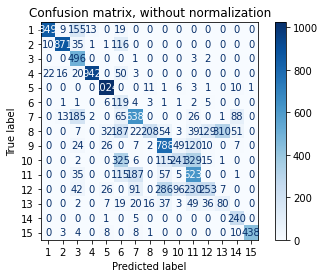

In [27]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_model, x_test, test_class_labels,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [29]:
# Classifying the whole hyperspectral image using the trained model
output_map = svm_model.predict(hs.T)

(664845,)


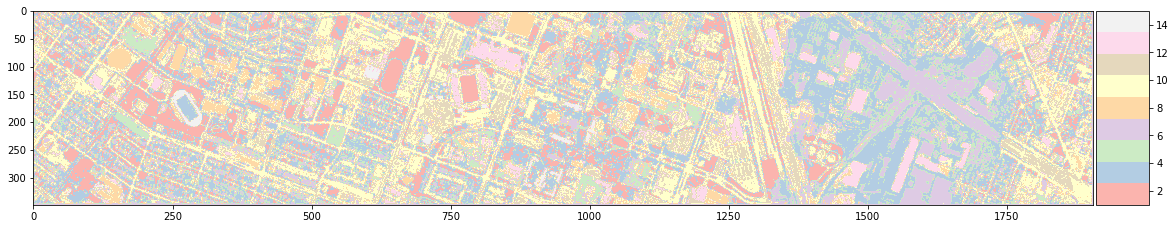

In [65]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
print(output_map.shape)
map_classified = np.reshape(output_map,(349,1905))

plt.figure(figsize=(20,20))
ax = plt.axes()
img = ax.imshow(map_classified, cmap = 'Pastel1')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(img,cax=cax) #orientation="horizontal"
#plt.show()